## This python file contains the implementation of logistic regression and SVM approach where the null values are dropped. Also with cross Validation approach.
## 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


In [3]:
# Load the Datasets

data_train=pd.read_csv("aps_failure_training_set.csv",skiprows=20)
data_test=pd.read_csv("aps_failure_test_set.csv",skiprows=20)

In [4]:
# Load the Datasets

df=pd.read_csv("aps_failure_training_set.csv",skiprows=20)
df_test=pd.read_csv("aps_failure_test_set.csv",skiprows=20)

In [5]:
df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [8]:
df_test["class"].replace({"neg":0,"pos":1},inplace=True)
df["class"].replace({"neg":0,"pos":1},inplace=True)

In [9]:
df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,0,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,0,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,0,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [10]:
# To remove Null value first let fill the null values
df_test.replace({"na":np.NAN},inplace=True)
df.replace({"na":np.NAN},inplace=True)

In [11]:
df=df.astype(float)
df_test=df_test.astype("float")

In [12]:
# drop the Null values from test data
df_test.dropna(inplace=True)
df.dropna(inplace=True)

In [13]:
testx=df_test.drop("class",axis=1)
testy=df_test["class"]



In [14]:
# test dataset
trainx=df.drop("class",axis=1)
trainy=df["class"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score,classification_report


## three approches
1. drop all NaN values
2. replace the NaN values with mean 
3. replace the NaN values with median


Model
1. Logistic Regression
2. Random Forest
3. SVM
4. Deep Learning Approch


## EDA

0.0    515
1.0     76
Name: class, dtype: int64


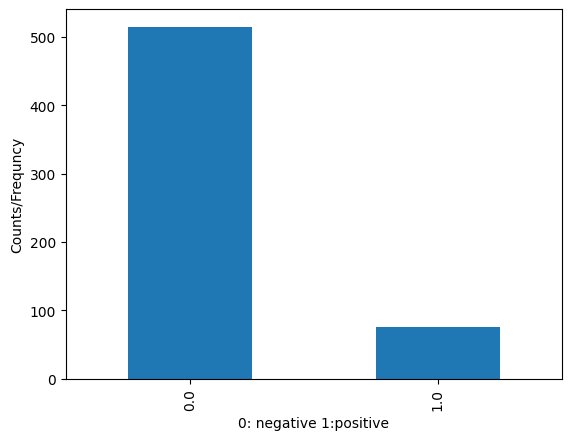

In [16]:
df["class"].value_counts().plot(kind="bar")
plt.xlabel("0: negative "+ "1:positive")
plt.ylabel("Counts/Frequncy")

print(df["class"].value_counts())


In [16]:
total_data=df["class"].value_counts().iloc[0] + df["class"].value_counts().iloc[1]
perc_negative=((df["class"].value_counts().iloc[0]/total_data)*100)
perc_positive=(df["class"].value_counts().iloc[1]/total_data)*100

In [17]:
print("Data belongs to positive class is {}%, and Data belongs to negative class is {}%".format(perc_positive.round(2),perc_negative.round(2)))

Data belongs to positive class is 12.86%, and Data belongs to negative class is 87.14%


this show that hte data is very much implanaced 

In [18]:
null_df=pd.DataFrame(df.isnull().sum())
df_most_null=pd.DataFrame(null_df[0].sort_values(ascending=False)[:20])

In [19]:
df_most_null.columns=["Counts"]

Text(0, 0.5, 'Frequncy of Null')

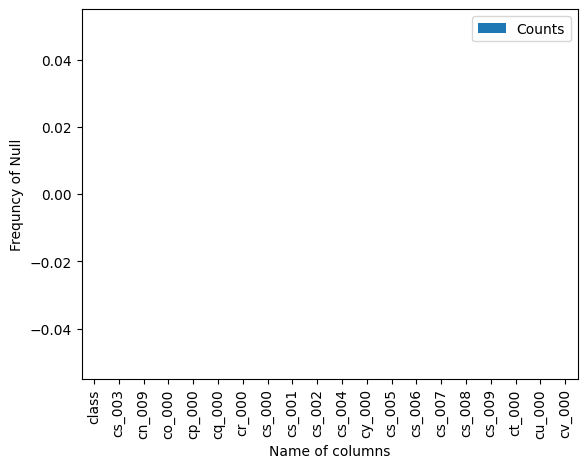

In [20]:
df_most_null.plot(kind="bar")
plt.xlabel("Name of columns")
plt.ylabel("Frequncy of Null")

## Model1: Logistic Regression

In [78]:
# Hyperparameters:
penalty = 'l2'
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
random_state = 2021
solver = 'liblinear' # For small datasets, it is good.
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)

In [20]:
k_fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2020)

In [80]:
TotalPredictPro=pd.DataFrame(data=[],index=trainy.index,columns=[0,1])
Score_train=[]
Score_cv=[]
for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    logReg.fit(train_x_fold,train_y_fold)

    predictpro_tr=logReg.predict_proba(train_x_fold)  # predict_proba is confidence score of detected value be;ongs to perticular class
    entropy_loss_tr=log_loss(train_y_fold,predictpro_tr)
    Score_train.append(entropy_loss_tr)


    predictpro_val=logReg.predict_proba(x_cv_fold)
    entropy_loss_val=log_loss(y_cv_fold,predictpro_val)
    Score_cv.append(entropy_loss_val)


    TotalPredictPro.loc[x_cv_fold.index,:] =logReg.predict_proba(x_cv_fold)


    print("******************************************************")
    print(f"The log_loss on training dataset is { entropy_loss_tr}")
    print(f"The log_loss on training dataset is { entropy_loss_val}")

print("**********************************************")
predicty=logReg.predict_proba(trainx)
total_entropy_loss=log_loss(trainy,predicty)

print(f"Total log_loss given as {total_entropy_loss}")


******************************************************
The log_loss on training dataset is 0.0015229376938354624
The log_loss on training dataset is 0.49690347131835205
******************************************************
The log_loss on training dataset is 0.00240009286004528
The log_loss on training dataset is 0.9050302831371416
******************************************************
The log_loss on training dataset is 0.00020995499048078446
The log_loss on training dataset is 1.2136855400877926
******************************************************
The log_loss on training dataset is 0.0009762745108612154
The log_loss on training dataset is 1.0311443624530556
******************************************************
The log_loss on training dataset is 0.0005578323007546281
The log_loss on training dataset is 0.5524070339432967
**********************************************
Total log_loss given as 0.11074092163039922


In [81]:
pred=logReg.predict(testx)

In [83]:
# classification report 
print(classification_report(testy,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       135
         1.0       0.87      0.87      0.87        30

    accuracy                           0.95       165
   macro avg       0.92      0.92      0.92       165
weighted avg       0.95      0.95      0.95       165



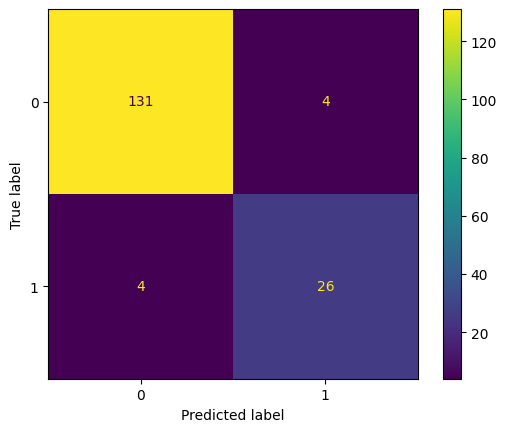

In [82]:
# plot confusion matrix
cm=confusion_matrix(testy,pred)
display=ConfusionMatrixDisplay(cm)
display.plot()

In [84]:
# model Accuracy
accuracy_score(testy,pred)

0.9515151515151515

In [85]:
# classification
print(classification_report(testy,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       135
         1.0       0.87      0.87      0.87        30

    accuracy                           0.95       165
   macro avg       0.92      0.92      0.92       165
weighted avg       0.95      0.95      0.95       165



In this case althought we want to reduce the maintaince cost, both both precision and recall is important so we muct have high F1-score

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.83')

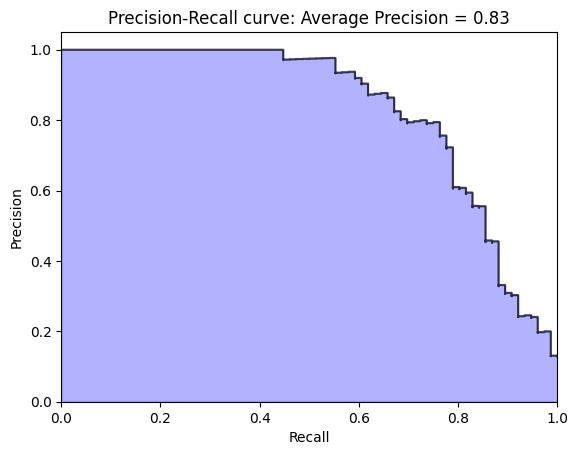

In [86]:
# precision and recall curve


preds = pd.concat([trainy,TotalPredictPro.loc[:,1]], axis=1)  # add two column to create a datafarme
preds.columns = ['trueLabel','prediction']
TotalPredictPro = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

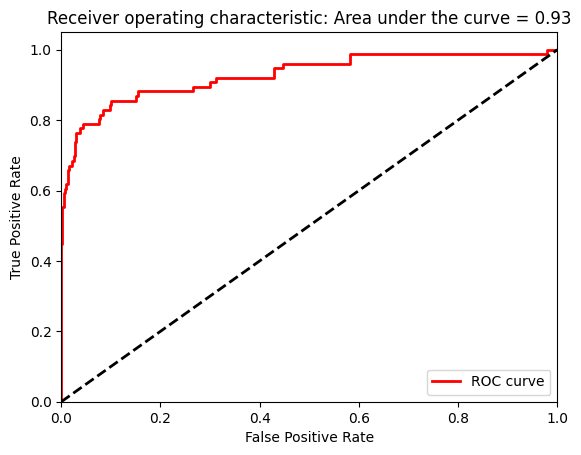

In [87]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Model 2: SVM 

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [22]:
svc=SVC(kernel="linear",gamma="auto",probability=True,C=1)

#Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [23]:
model=svc

In [26]:
totalPredictPro_svc=pd.DataFrame(data=[],index=trainy.index,columns=[0,1])
Score_train=[]
Score_cv=[]
for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model.fit(train_x_fold,train_y_fold)

    predictpro_tr=model.predict_proba(train_x_fold)  # predict_proba is confidence score of detected value be;ongs to perticular class
    entropy_loss_tr=log_loss(train_y_fold,predictpro_tr)
    Score_train.append(entropy_loss_tr)


    predictpro_val=model.predict_proba(x_cv_fold)
    entropy_loss_val=log_loss(y_cv_fold,predictpro_val)
    Score_cv.append(entropy_loss_val)


    totalPredictPro_svc.loc[x_cv_fold.index,:] =model.predict_proba(x_cv_fold)


    print("******************************************************")
    print(f"The log_loss on training dataset is { entropy_loss_tr}")
    print(f"The log_loss on training dataset is { entropy_loss_val}")

print("**********************************************")
predicty=model.predict_proba(trainx)
total_entropy_loss=log_loss(trainy,predicty)

print(f"Total log_loss given as {total_entropy_loss}")


******************************************************
The log_loss on training dataset is 0.146230878543902
The log_loss on training dataset is 0.14396225508661978
******************************************************
The log_loss on training dataset is 0.1084469088159385
The log_loss on training dataset is 0.25060223804061627
******************************************************
The log_loss on training dataset is 0.07545366861456779
The log_loss on training dataset is 0.23286021983289315
******************************************************
The log_loss on training dataset is 0.11239713432456837
The log_loss on training dataset is 0.2373993943345599
******************************************************
The log_loss on training dataset is 0.1013577186274491
The log_loss on training dataset is 0.0986517111993086
**********************************************
Total log_loss given as 0.10081743288037538


In [27]:
pred_tr=model.predict(testx)

## Evaluation

In [29]:
print(classification_report(testy,pred_tr))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       135
         1.0       0.84      0.87      0.85        30

    accuracy                           0.95       165
   macro avg       0.90      0.91      0.91       165
weighted avg       0.95      0.95      0.95       165



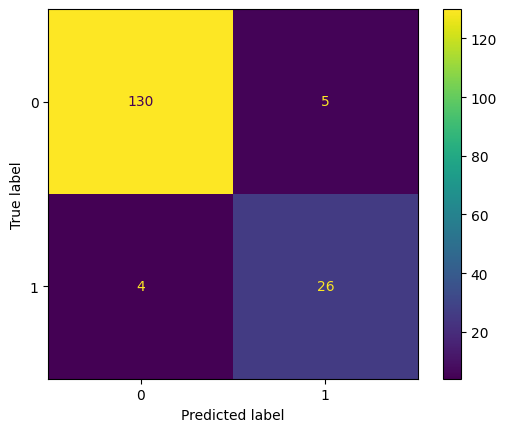

In [30]:
# Confusion Matrix
cm=confusion_matrix(testy,pred_tr)
dips=ConfusionMatrixDisplay(cm)
dips.plot()

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.81')

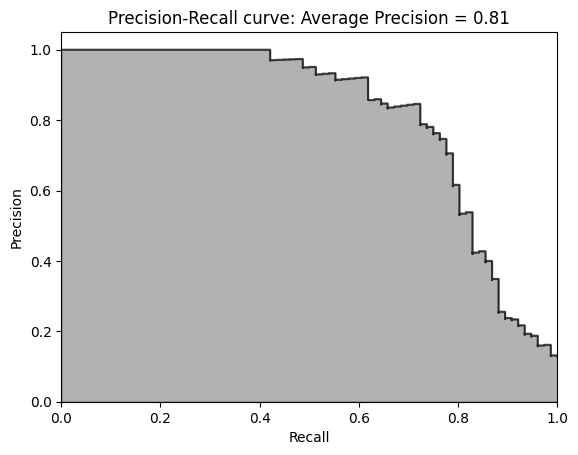

In [31]:
# precision and recall curve


preds = pd.concat([trainy,totalPredictPro_svc.loc[:,1]], axis=1)

preds.columns = ['trueLabel','prediction']
totalPredictPro_svc = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

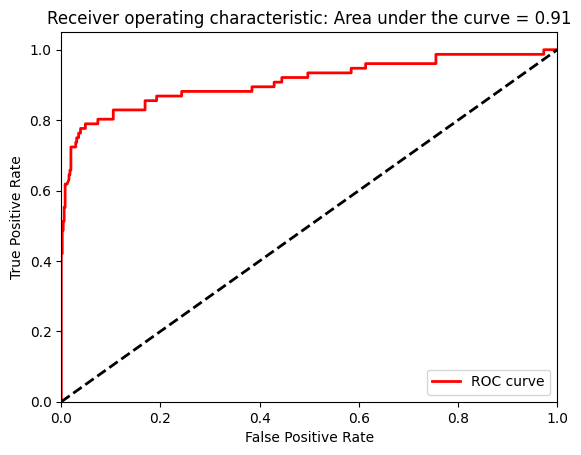

In [32]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# let try using different kernals


In [33]:
# Performace evalution based on different Kernels

kernels = ['poly','rbf','sigmoid']
Cs = np.logspace(0, 3, 100)
#Setting up the grid:
grid = {'kernel': kernels,'C':Cs}


gridSearch = GridSearchCV(model, grid, scoring="accuracy", cv=k_fold, refit=True)
gridSearch.fit(trainx, trainy)
results = gridSearch.cv_results_

print('Best R^2 obtained:', gridSearch.best_score_)
print('gamma value for the best case:', gridSearch.best_estimator_.gamma)
print('kernel value for the best case:', gridSearch.best_estimator_.kernel)
print('C value for the best case:', gridSearch.best_estimator_.C)

Best R^2 obtained: 0.8714143284432417
gamma value for the best case: auto
kernel value for the best case: rbf
C value for the best case: 1.0


C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warn

In [45]:
svc=gridSearch.best_estimator_

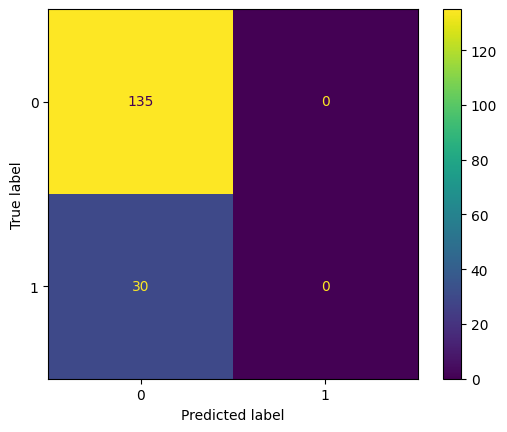

In [47]:
y_pred=svc.predict(testx)
cm=confusion_matrix(testy,y_pred)

dis=ConfusionMatrixDisplay(cm)
dis.plot()

## this model not performaed well

In [ ]:
testy.value_counts()

0    135
1     30
Name: class, dtype: int64

neg show failure is not due to APS
pos show failure is due to APS

so on which factor we should focus, where precision or recall
precision=TP/(TP + FP)     if this is high which mean we have less false positiove cases

recall=TP/(TP+FN)   if this is high which mean we have maximum low FN case


In [73]:
# Number of trees in the forest:
n_estimators = 15
# Number of features to consider when looking for the best split:
max_features="sqrt"
# Maximum depth of the tree:
max_depth = 20
# Minimum number of samples required to split an internal node:
min_samples_split = 3
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 1
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2020
#-----------------------------------------------------------------
# Creating the classifier:
RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state)

In [74]:
model1=RFC

trainScore=[]
valScore=[]
total_prob=pd.DataFrame(data=[],index=trainx.index,columns=[0,1])


for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model1.fit(train_x_fold,train_y_fold)
    # let look at prediction probability of being 0(neg) or 1(pos) for training fold
    prob_train=model1.predict_proba(train_x_fold)
    loglosstrain=log_loss(train_y_fold,prob_train)
    trainScore.append(loglosstrain)

    # let look at prediction probability of being 0(neg) or 1(pos) for cv fold
    prob_cv=model1.predict_proba(x_cv_fold)
    loglosscv=log_loss(y_cv_fold,prob_cv)
    valScore.append(loglosscv)


    total_prob.loc[x_cv_fold.index,:]=model1.predict_proba(x_cv_fold)
    
    print("**************************************")
    print(f"Training Log Loss is {loglosstrain}")
    print(f"CV Log Loss is {loglosscv}")

pre_train_y=model1.predict_proba(trainx)
loglosstotal=log_loss(trainy,pre_train_y) 

print("************************************")
print(f"RFC log loss {loglosstotal}")


**************************************
Training Log Loss is 0.002606243893765611
CV Log Loss is 0.12538143094094314
**************************************
Training Log Loss is 0.002595337144055305
CV Log Loss is 0.7205983155141681
**************************************
Training Log Loss is 0.003484389504300789
CV Log Loss is 0.11471433101641605
**************************************
Training Log Loss is 0.002595337144055305
CV Log Loss is 0.0634375517795244
**************************************
Training Log Loss is 0.002451990202509085
CV Log Loss is 0.10540981400078885
************************************
RFC log loss 0.02300871305901841


In [75]:
predict_RF=model1.predict(testx)

In [76]:
print(classification_report(testy,predict_RF))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       135
         1.0       0.93      0.87      0.90        30

    accuracy                           0.96       165
   macro avg       0.95      0.93      0.94       165
weighted avg       0.96      0.96      0.96       165



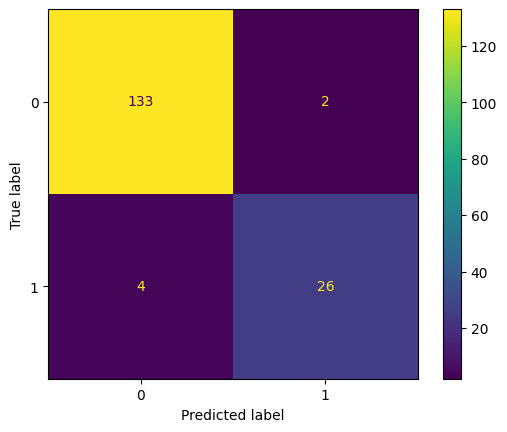

In [77]:

cm=confusion_matrix(testy,predict_RF)
dis=ConfusionMatrixDisplay(cm)
dis.plot()

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.90')

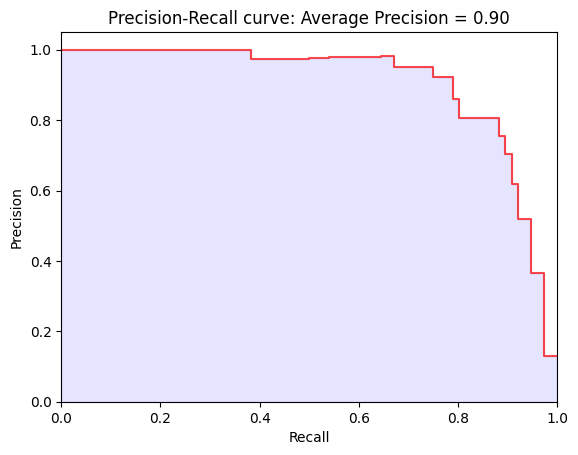

In [78]:
preds = pd.concat([trainy,total_prob.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='r', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

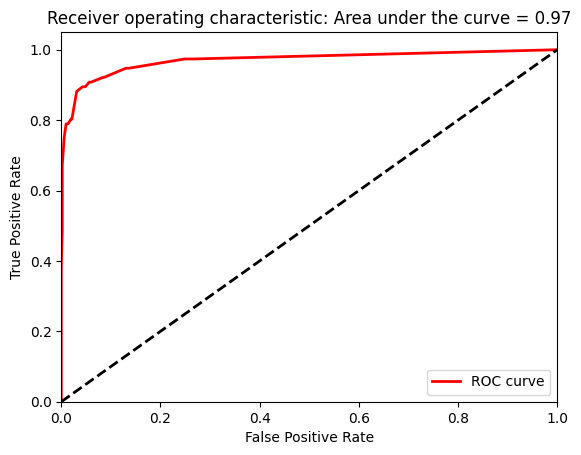

In [79]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
# ## i
# n_estimators=list(range(1,16))

# max_depth = list(range(1,25))

# min_samples_split = list(range(1,10))

# min_samples_leaf = list(range(1,10))

# grid = {'n_estimators': n_estimators,'max_depth':max_depth,'min_samples_split': min_samples_split,'min_samples_leaf':min_samples_leaf}


# gridSearch = GridSearchCV(model1, grid, scoring="accuracy", cv=k_fold, refit=True)
# gridSearch.fit(trainx, trainy)
# results = gridSearch.cv_results_

# print('Best R^2 obtained:', gridSearch.best_score_)
# print('estimators value for the best case:', gridSearch.best_estimator_.n_estimators)
# print('max_depth value for the best case:', gridSearch.best_estimator_.max_depth)
# print('min samples value for the best case:', gridSearch.best_estimator_.min_samples_split)
# print('min sample leaf value for the best case:', gridSearch.best_estimator_.min_samples_leaf)

## Machine learning Approch: adaboost

In [93]:
# adaboost hyperparameters

n_estimators=20
learning_rate=0.0001
algorithm="SAMME.R"        #{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’

In [94]:
adaboost=AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate,algorithm=algorithm,random_state=2020)

In [95]:
model1=adaboost

trainScore=[]
valScore=[]
TotalPredictPro_ada=pd.DataFrame(data=[],index=trainx.index,columns=[0,1])


for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model1.fit(train_x_fold,train_y_fold)
    # let look at prediction probability of being 0(neg) or 1(pos) for training fold
    prob_train=model1.predict_proba(train_x_fold)
    loglosstrain=log_loss(train_y_fold,prob_train)
    trainScore.append(loglosstrain)

    # let look at prediction probability of being 0(neg) or 1(pos) for cv fold
    prob_cv=model1.predict_proba(x_cv_fold)
    loglosscv=log_loss(y_cv_fold,prob_cv)
    valScore.append(loglosscv)


    TotalPredictPro_ada.loc[x_cv_fold.index,:]=model1.predict_proba(x_cv_fold)
    
    print("**************************************")
    print(f"Training Log Loss is {loglosstrain}")
    print(f"CV Log Loss is {loglosscv}")

pre_train_y=model1.predict_proba(trainx)
loglosstotal=log_loss(trainy,pre_train_y) 

print("************************************")
print(f"RFC log loss {loglosstotal}")


**************************************
Training Log Loss is 0.23555241610538966
CV Log Loss is 0.3096369119382945
**************************************
Training Log Loss is 0.22013131356352386
CV Log Loss is 0.2891121053211299
**************************************
Training Log Loss is 0.22253348720215058
CV Log Loss is 0.279217602635092
**************************************
Training Log Loss is 0.24666245404234646
CV Log Loss is 0.18310643112222838
**************************************
Training Log Loss is 0.24384517448187143
CV Log Loss is 0.27216741558118707
************************************
RFC log loss 0.24950003818698016


In [96]:
predict_ad=model1.predict(testx)

In [98]:
print(classification_report(testy,predict_ad))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       135
         1.0       0.81      0.70      0.75        30

    accuracy                           0.92       165
   macro avg       0.87      0.83      0.85       165
weighted avg       0.91      0.92      0.91       165



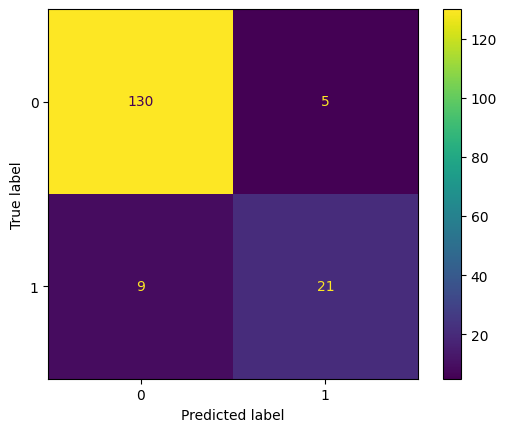

In [99]:
cm=confusion_matrix(testy,predict_ad)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.50')

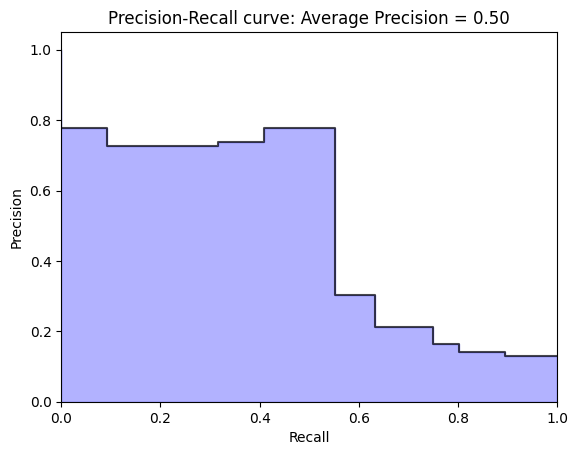

In [100]:
# precision and recall curve


preds_ada = pd.concat([trainy,TotalPredictPro_ada.loc[:,1]], axis=1)  # add two column to create a datafarme
preds_ada.columns = ['trueLabel','prediction']
TotalPredictPro_ada = preds_ada.copy()
precision, recall, thresholds = precision_recall_curve(preds_ada['trueLabel'],preds_ada['prediction'])
average_precision = average_precision_score(preds_ada['trueLabel'],preds_ada['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

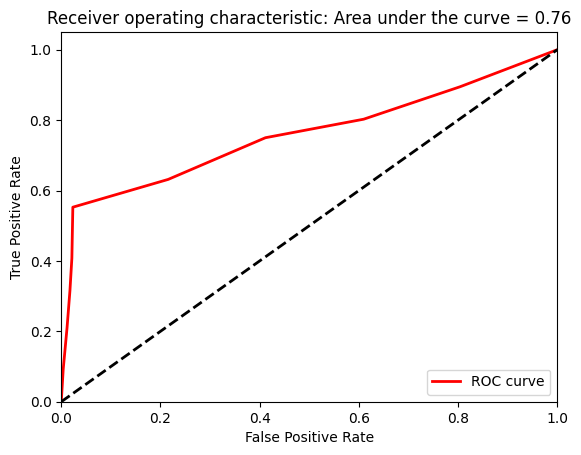

In [101]:
fpr, tpr, thresholds = roc_curve(preds_ada['trueLabel'],preds_ada['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [130]:
# adaboost hyperparameters

n_estimators=110
learning_rate=1 
algorithm="SAMME.R"        #{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’


adaboost=AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate,algorithm=algorithm,random_state=2020)

In [131]:
model1=adaboost

trainScore=[]
valScore=[]
TotalPredictPro_ada=pd.DataFrame(data=[],index=trainx.index,columns=[0,1])


for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model1.fit(train_x_fold,train_y_fold)
    # let look at prediction probability of being 0(neg) or 1(pos) for training fold
    prob_train=model1.predict_proba(train_x_fold)
    loglosstrain=log_loss(train_y_fold,prob_train)
    trainScore.append(loglosstrain)

    # let look at prediction probability of being 0(neg) or 1(pos) for cv fold
    prob_cv=model1.predict_proba(x_cv_fold)
    loglosscv=log_loss(y_cv_fold,prob_cv)
    valScore.append(loglosscv)


    TotalPredictPro_ada.loc[x_cv_fold.index,:]=model1.predict_proba(x_cv_fold)
    
    print("**************************************")
    print(f"Training Log Loss is {loglosstrain}")
    print(f"CV Log Loss is {loglosscv}")

pre_train_y=model1.predict_proba(trainx)
adaboostlosstotal=log_loss(trainy,pre_train_y) 

print("************************************")
print(f"RFC log loss {adaboostlosstotal}")


**************************************
Training Log Loss is 0.4781764973949288
CV Log Loss is 0.49540673271893626
**************************************
Training Log Loss is 0.4746263329941363
CV Log Loss is 0.5031346555229737
**************************************
Training Log Loss is 0.4753917836310066
CV Log Loss is 0.48882343364598657
**************************************
Training Log Loss is 0.5135381333141462
CV Log Loss is 0.5244381181665252
**************************************
Training Log Loss is 0.4691279724287459
CV Log Loss is 0.4903615868860675
************************************
RFC log loss 0.47336750966387947


In [132]:
predict_ad=model1.predict(testx)

In [133]:
print(classification_report(testy,predict_ad))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       135
         1.0       0.96      0.87      0.91        30

    accuracy                           0.97       165
   macro avg       0.97      0.93      0.95       165
weighted avg       0.97      0.97      0.97       165



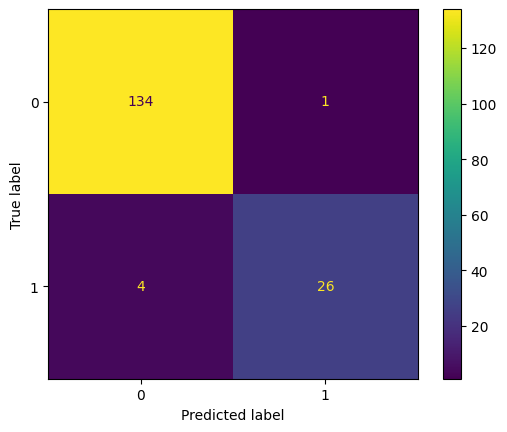

In [134]:
cm=confusion_matrix(testy,predict_ad)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.90')

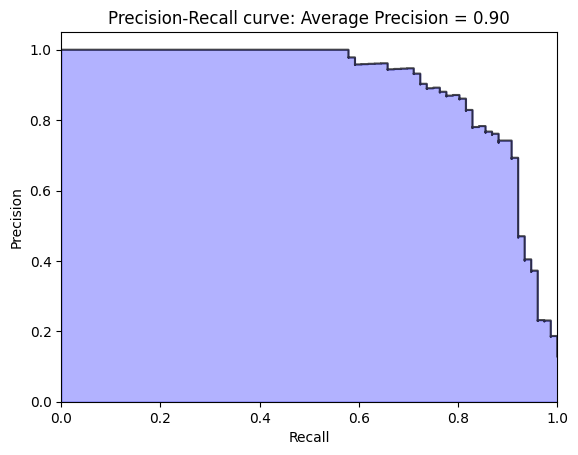

In [135]:
# precision and recall curve


preds_ada = pd.concat([trainy,TotalPredictPro_ada.loc[:,1]], axis=1)  # add two column to create a datafarme
preds_ada.columns = ['trueLabel','prediction']
TotalPredictPro_ada = preds_ada.copy()
precision, recall, thresholds = precision_recall_curve(preds_ada['trueLabel'],preds_ada['prediction'])
average_precision = average_precision_score(preds_ada['trueLabel'],preds_ada['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

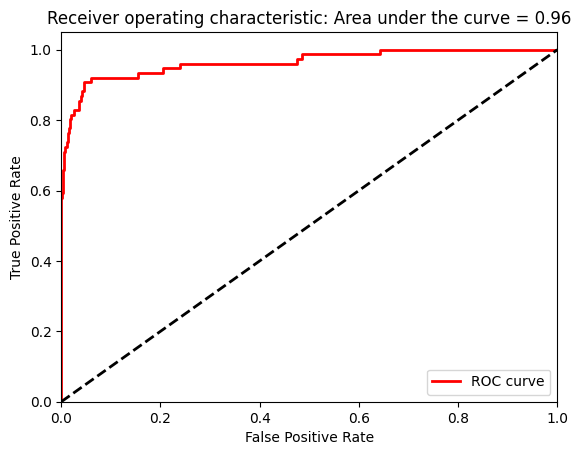

In [136]:
fpr, tpr, thresholds = roc_curve(preds_ada['trueLabel'],preds_ada['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()